Amy Geraghty
Final Project Implementation 

In [1]:
#Import statements needed to run the program
#For downloading dataset
import os

# For reading images
import cv2

#Imported to help with processing arrays
import numpy as np
import operator

#Used for plotting the images and seeing them in Jupyter notebook
from matplotlib.pyplot import imshow 
%matplotlib inline 

#Helps with one-hot encoding
from sklearn.preprocessing import LabelEncoder

#Keras imports to help with image classification and creating the Convolutional Neural Network 
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [2]:
#Both of these functions are based on Gauri's Caltech Experiment, but modified by me to meet my needs

#This function grabs the images from their place in my computer
def get_images(object_category, data_directory):
    obj_category_dir = os.path.join(os.path.join(data_directory,"Fruits"),object_category)
    images = [os.path.join(obj_category_dir,img) for img in os.listdir(obj_category_dir)]
    return images

#This function prepares the images in the format I want them for this project. I read in the image from the
#specified file, which is automatically done in the BGR color scheme. The convertColor function transforms the 
#images into RGB color scheme which returns the images to the expected colors. (I used this becuase imread was 
#making all my images look blue/purple.) Finally, I resized the images to 128 pixels by 128 pixels.
def read_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC)
    return img

In [3]:
#Checking that the images got read in appropriately and learning how to access them
lime_imgs = get_images('Limes','./data')

In [4]:
#Check that the file is configured the way we expect (should be stored in 
#Data Folder -> Fruits Folder -> Limes Folder -> the filename should have lime in it and be a jpg)
lime_imgs[0]

'./data/Fruits/Limes/lime11.jpg'

In [5]:
#read in one specific image
lime_test_img = read_image(lime_imgs[0])

In [6]:
#Checking that the shape of the image is what we expect, it should be (128,128,3) based on how I resized them
lime_test_img.shape

(128, 128, 3)

In [7]:
#Function is based on Gauri's Caltech Experiment and returns the breakdown of how many images are in each category
def return_images_per_category(data_directory):
    categories = os.listdir(data_directory+"/Fruits/")
    object_images_count_dict = {}
    for category in categories:
        object_images_count_dict[category] = len(os.listdir(data_directory+"/Fruits/"+category))
    object_images_count_dict = sorted(object_images_count_dict.items(), key=operator.itemgetter(1), reverse=True)
    return object_images_count_dict

In [8]:
#The loop below stores each of the images in x using the read_image method and stores the corresponding category
#of each image in y. Vaguely based on Gauri's Caltech Experiment.
i = 0
x = np.ndarray((300, 128, 128, 3), dtype=np.uint8)
y = []
for category,_ in return_images_per_category('./data'):
    if category not in ('Apples', 'Bananas', 'Blackberries', 'Blueberries', 'Grapes', 'Lemons', 'Limes', 'Oranges', 'Raspberries', "Strawberries"):
        continue
    for image in get_images(category, './data'):
        if not image.endswith('.jpg'):
            continue
        x[i] =  read_image(image)
        y.insert(i,category) 
        i += 1

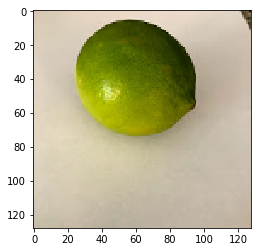

In [9]:
#Using the imshow function to view the image stored at x[60] was transferred correctly
imshow(x[60])

In [10]:
#View the category of fruit seen in x[60] and make sure that the picture above is a part of the category below
y[60]

'Limes'

In [11]:
#Used this for loop to separate the images and labels into a training and testing set. I wanted an 80-20-20 training
#test validation split. Since all the categories of fruits were in bunches of 30, I chose the first 6 images to be in
#the test set(aka all of the numbers listed in testNumbers) From there, I used a for loop to iterate through all 
#the images if i was in testNumbers, that image and its corresponding label were added to X_test and y_test, 
#respectively. A similar method was done for the validation set taking the next six images of each fruit for the
#validation set. Otherwise, the image and corresponding label were added to X_train and y_train. I used iTEST
#iTRAIN, and iVAL to hold the place in the testing,training, and validation arrays, respectively. 
iTEST = 0
iTRAIN = 0
iVAL = 0
i = 0
X_train = np.ndarray((180, 128, 128, 3), dtype=np.uint8)
y_train = []
X_test = np.ndarray((60, 128, 128, 3), dtype=np.uint8)
y_test = []
X_val = np.ndarray((60, 128, 128, 3), dtype=np.uint8)
y_val = []
testNumbers = [0,1,2,3,4,5,30,31,32,33,34,35,60,61,62,63,64,65,90,91,92,93,94,95,120,121,122,123,124,125,150,151,152,153,154,155,180,181,182,183,184,185,210,211,212,213,214,215,240,241,242,243,244,245,270,271,272,273,274,275]
valNumbers = [6,7,8,9,10,11,36,37,38,39,40,41,66,67,68,69,70,71,96,97,98,99,100,101,126,127,128,129,130,131,156,157,158,159,160,161,186,187,188,189,190,191,216,217,218,219,220,221,246,247,248,249,250,251,276,277,278,279,280,281]

for i in range(300):
    if i in testNumbers:
        X_test[iTEST] =  x[i]
        y_test.insert(iTEST,y[i])
        iTEST += 1
    elif i in valNumbers:
        X_val[iVAL] =  x[i]
        y_val.insert(iVAL,y[i])
        iVAL += 1
    else:
        X_train[iTRAIN] =  x[i]
        y_train.insert(iTRAIN,y[i]) 
        iTRAIN += 1      
    i += 1 

'Grapes'

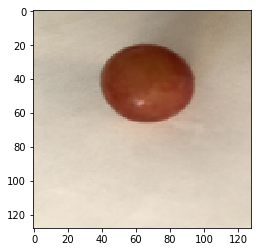

In [12]:
#Checking that the test images and labels got transferred over correctly
imshow(X_test[59])
y_test[59]

'Blueberries'

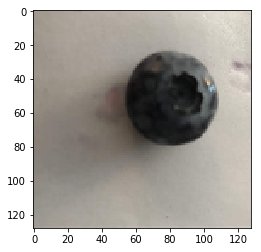

In [13]:
#Checking that the validation images and labels got transferred over correctly
imshow(X_val[4])
y_val[4]

'Lemons'

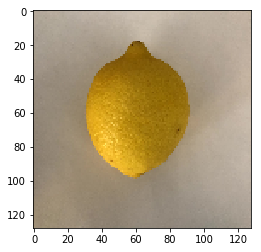

In [14]:
#Checking that the test images and labels got transferred over correctly
imshow(X_train[130])
y_train[130]

In [15]:
#Check that the images ended up in the correct distribution. Should be 180 in Training Set and 60 in both the
#Test Set and Validation Set to achieve the desired 60-20-20 split
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))
print(np.shape(X_val), np.shape(y_val))

((180, 128, 128, 3), (180,))
((60, 128, 128, 3), (60,))
((60, 128, 128, 3), (60,))


In [16]:
#Changing the type of X_train, X_test, and X_val to be float32, normalizing the data, and getting the final shape
#of the images
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)
print("Validation matrix shape", X_val.shape)

('Train matrix shape', (180, 128, 128, 3))
('Test matrix shape', (60, 128, 128, 3))
('Validation matrix shape', (60, 128, 128, 3))


In [17]:
#One-hot encoding based on Class Examples and Gauri's
label_encoder = LabelEncoder()
y_train_one_hot = label_encoder.fit_transform(y_train)
y_test_one_hot = label_encoder.fit_transform(y_test)
y_val_one_hot = label_encoder.fit_transform(y_val)

y_train_one_hot = to_categorical(y_train_one_hot)
y_test_one_hot = to_categorical(y_test_one_hot)
y_val_one_hot = to_categorical(y_val_one_hot)

In [18]:
#Check that the lengths of the arrays are correct. Output should be: 180, 60, 60, 300, 300
print(len(y_train_one_hot))
print(len(y_test_one_hot))
print(len(y_val_one_hot))
print(len(y))
print(len(x))

180
60
60
300
300


In [19]:
#Sequential models serves as the base of a linear stack of layers that make up a Convolutional Neural Network
#This model serves as my first attempt a CNN, which is made up of 19 layers.
model = Sequential()

This Conv2D layer has 32 features, a relu activation and needs to specify the input
of the CNN since it is the first layer. 

In [20]:
model.add(Conv2D(32, (3,3),  activation='relu', input_shape = (128, 128, 3)))

Adding a dropout rate of 20% as a layer

In [21]:
model.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


This Conv2D layer has 32 features and a relu activation

In [22]:
model.add(Conv2D(32,(3,3), activation = 'relu'))

The MaxPooling2D function reduces the size of the feature maps, usually using a 2x2 pool 
size to achieve maximum pooling.

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))

This Conv2D layer has 64 features and a relu activation

In [24]:
model.add(Conv2D(64,(3,3), activation = 'relu'))

Adding a dropout rate of 20% as a layer

In [25]:
model.add(Dropout(0.2))

This Conv2D layer has 64 features and a relu activation

In [26]:
model.add(Conv2D(64,(3,3), activation = 'relu'))

The MaxPooling2D function reduces the size of the feature maps, usually using a 2x2
pool size to achieve maximum pooling.

In [27]:
model.add(MaxPooling2D(pool_size=(2, 2)))

This Conv2D layer has 128 features and a relu activation

In [28]:
model.add(Conv2D(128,(3,3), activation = 'relu'))

Adding a dropout rate of 20% as a layer

In [29]:
model.add(Dropout(0.2))

This Conv2D layer has 128 features and a relu activation

In [30]:
model.add(Conv2D(128,(3,3), activation = 'relu'))

The MaxPooling2D function reduces the size of the feature maps, usually using a 2x2
pool size to achieve maximum pooling.

In [31]:
model.add(MaxPooling2D(pool_size=(2, 2)))

The Flatten function reduces all the feature maps to a single column.

In [32]:
model.add(Flatten())

Adding a dropout rate of 20% as a layer

In [33]:
model.add(Dropout(0.2))

A fully connected convolutional layer is achieved using the Dense function which specifies
the number of nodes you want to be in the hidden layer, in this case 1024, and again relu
is a common activation function for CNNs.

In [34]:
model.add(Dense(1024, activation='relu'))

Adding a dropout rate of 20% as a layer

In [35]:
model.add(Dropout(0.2))

A fully connected convolutional layer is achieved using the Dense function which specifies the number of nodes you want to be in the hidden layer, in this case 512, and again relu is a common activation function for CNNs.

In [36]:
model.add(Dense(512, activation='relu'))

Adding a dropout rate of 20% as a layer

In [37]:
model.add(Dropout(0.2))

A fully connected convolutional layer is achieved using the Dense function which specifies
the number of nodes you want to be in the hidden layer, in this case 10. The final layer of
CNNs tend to have softmax activation. This activation layer serves as a probability distributionas all of the outputs add up to be 1.

In [38]:
model.add(Dense(10, activation='softmax'))

In [39]:
#Compiling the model with the loss parameter as categorical_crossentropy because there are more
#than two categories I am attempting to classify, I used adam as the optimizer as we did for 
#the class examples, and wanted to get the accuracy scores, so I chose that as my metric.
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
#This will fit the model and break the training data into 20% validation data and 80% training data
hist = model.fit(X_train, y_train_one_hot, 
           batch_size=100, epochs=50, validation_data = (X_val, y_val_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 35s 197ms/step - loss: 2.4200 - acc: 0.1000 - val_loss: 2.2971 - val_acc: 0.1000
Epoch 2/50
180/180 [==============================] - 19s 107ms/step - loss: 2.2969 - acc: 0.1000 - val_loss: 2.2993 - val_acc: 0.1000
Epoch 3/50
180/180 [==============================] - 19s 104ms/step - loss: 2.2853 - acc: 0.1056 - val_loss: 2.2872 - val_acc: 0.2333
Epoch 4/50
180/180 [==============================] - 19s 104ms/step - loss: 2.2221 - acc: 0.1500 - val_loss: 2.1914 - val_acc: 0.2167
Epoch 5/50
180/180 [==============================] - 19s 104ms/step - loss: 1.9742 - acc: 0.2167 - val_loss: 1.8766 - val_acc: 0.4000
Epoch 6/50
180/180 [==============================] - 19s 104ms/step - loss: 1.6372 - acc: 0.3556 - val_loss: 1.5451 - val_acc: 0.4333
Epoch 7/50
180/180 [==============================]

In [41]:
#Accuracy of test data, which is about 78.3%
model.evaluate(X_test, y_test_one_hot)[1]

60/60 [==============================] - 1s 19ms/step


0.6833333373069763

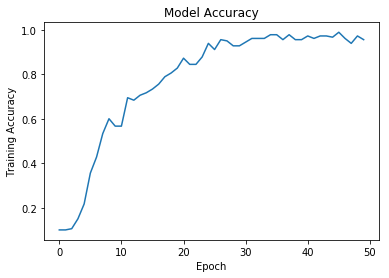

In [42]:
#Visualize the models training accuracy of the first model
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()

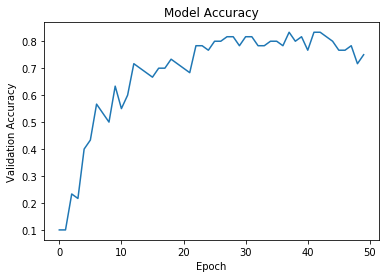

In [43]:
#Visualize the models validation accuracy of the first model
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

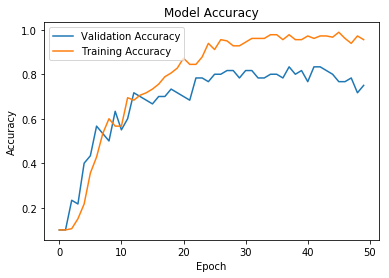

In [44]:
#Visualize the first model's validation accuracy and training accuracy
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.plot(hist.history['acc'], label = 'Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

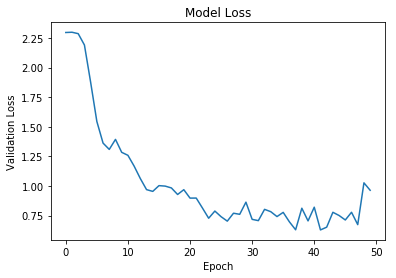

In [45]:
#Visualize the models validation loss of the first model
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

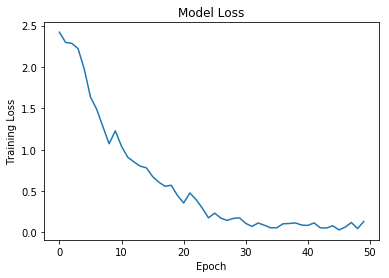

In [46]:
#Visualize the models training loss of the first model
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show()

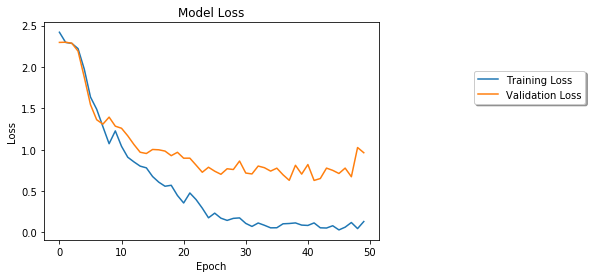

In [47]:
#Visualize the first model training loss and validation loss on the same plot
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [48]:
#Sequential model serves as the base of a linear stack of layers for Model 2, which only has 9 layers as an 
#attempt to improve the accuracy of the CNN on the test data
model2 = Sequential()

In [49]:
model2.add(Conv2D(32, (3,3),  activation='relu', input_shape = (128, 128, 3)))

In [50]:
model2.add(Dropout(0.2))

In [51]:
model2.add(Conv2D(32,(3,3), activation = 'relu'))

In [52]:
model2.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
model2.add(Conv2D(64,(3,3), activation = 'relu'))

In [54]:
model2.add(Dropout(0.2))

In [55]:
model2.add(Flatten())

In [56]:
#Changed from 1024 to 128
model2.add(Dense(128, activation='relu'))

In [57]:
model2.add(Dense(10, activation='softmax'))

In [58]:
#Compiling the model with the loss parameter as categorical_crossentropy because there are more
#than two categories I am attempting to classify, I used adam as the optimizer as we did for 
#the class examples, and wanted to get the accuracy scores, so I chose that as my metric.
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
#This will fit model2 and break the training data into 20% validation data and 80% training data
hist2 = model2.fit(X_train, y_train_one_hot, 
           batch_size=100, epochs=20, validation_data = (X_val, y_val_one_hot))

Train on 180 samples, validate on 60 samples
Epoch 1/20
180/180 [==============================] - 20s 111ms/step - loss: 5.2686 - acc: 0.1111 - val_loss: 4.2907 - val_acc: 0.2000
Epoch 2/20
180/180 [==============================] - 14s 79ms/step - loss: 7.1949 - acc: 0.1611 - val_loss: 3.3098 - val_acc: 0.2000
Epoch 3/20
180/180 [==============================] - 14s 75ms/step - loss: 4.5011 - acc: 0.1444 - val_loss: 2.5230 - val_acc: 0.1667
Epoch 4/20
180/180 [==============================] - 14s 76ms/step - loss: 2.4988 - acc: 0.1556 - val_loss: 2.1908 - val_acc: 0.3167
Epoch 5/20
180/180 [==============================] - 14s 75ms/step - loss: 2.1818 - acc: 0.2500 - val_loss: 2.1246 - val_acc: 0.2500
Epoch 6/20
180/180 [==============================] - 16s 89ms/step - loss: 2.0935 - acc: 0.3556 - val_loss: 2.0117 - val_acc: 0.2667
Epoch 7/20
180/180 [==============================] - 18s 100ms/step - loss: 1.8805 - acc: 0.2944 - val_loss: 1.8366 - val_acc: 0.4167
Epoch 8/20
180/

In [60]:
#Accuracy of test data, which is about 71.7% for model 2. This model performed as well as the first one. No 
#improvement on the accuracy score of the test data
model2.evaluate(X_test, y_test_one_hot)[1]

60/60 [==============================] - 1s 10ms/step


0.7166666746139526

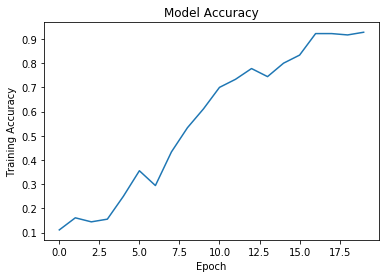

In [61]:
#Visualize the models training accuracy of the second model 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist2.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()

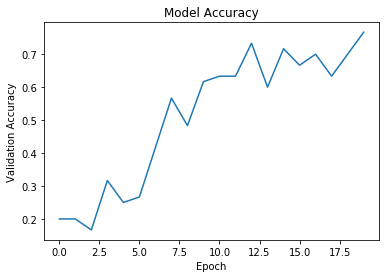

In [62]:
#Visualize the models validation accuracy of the second model 
plt.plot(hist2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

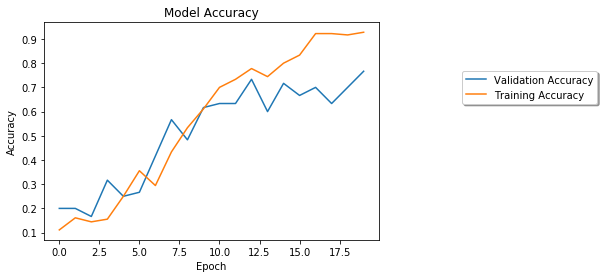

In [63]:
#Visualize the second model's validation accuracy and training accuracy  
plt.plot(hist2.history['val_acc'], label='Validation Accuracy')
plt.plot(hist2.history['acc'], label = 'Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

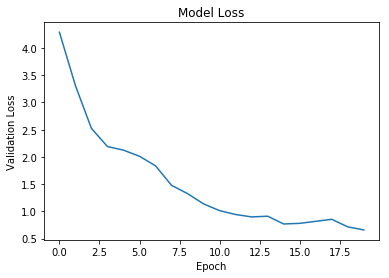

In [64]:
#Visualize the models validation loss of the second model 
plt.plot(hist2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

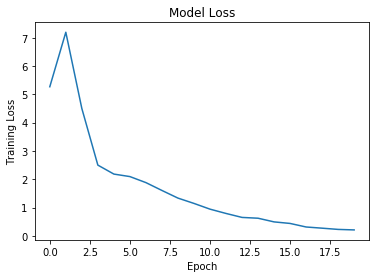

In [65]:
#Visualize the models training loss of the second model 
plt.plot(hist2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show()

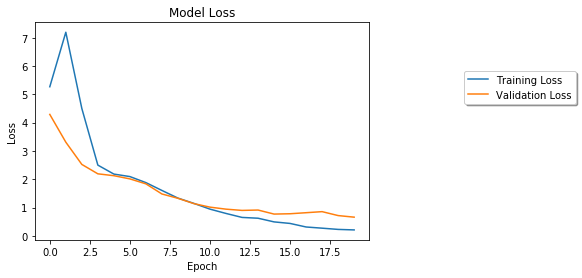

In [66]:
#Visualize the second model's training loss and validation loss on the same plot 
plt.plot(hist2.history['loss'], label = 'Training Loss')
plt.plot(hist2.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [67]:
#Sequential model3 serves as the base of a linear stack of layers. This CNN was compromised of 18 layers in an 
#attempt to improve the accuracy score of the test data
model3 = Sequential()

In [68]:
model3.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128, 128, 3)))

In [69]:
model3.add(MaxPooling2D(pool_size=(2, 2)))

In [70]:
model3.add(Conv2D(64,(3,3), activation = 'relu'))

In [71]:
model3.add(Dropout(0.2))

In [72]:
model3.add(Conv2D(64,(3,3), activation = 'relu'))

In [73]:
model3.add(MaxPooling2D(pool_size=(2, 2)))

In [74]:
model3.add(Conv2D(128,(3,3), activation = 'relu'))

In [75]:
model3.add(Dropout(0.2))

In [76]:
model3.add(Conv2D(128,(3,3), activation = 'relu'))

In [77]:
model3.add(MaxPooling2D(pool_size=(2, 2)))

In [78]:
model3.add(Flatten())

In [79]:
model3.add(Dropout(0.2))

In [80]:
model3.add(Dense(1024, activation='relu'))

In [81]:
model3.add(Dropout(0.2))

In [82]:
model3.add(Dense(512, activation='relu'))

In [83]:
model3.add(Dropout(0.2))

In [84]:
model3.add(Dense(10, activation='softmax'))

In [85]:
#Compiling the model with the loss parameter as categorical_crossentropy because there are more
#than two categories I am attempting to classify, I used adam as the optimizer as we did for 
#the class examples, and wanted to get the accuracy scores, so I chose that as my metric.
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [86]:
#This will fit the model and break the training data into 20% validation data and 80% training data
hist3 = model3.fit(X_train, y_train_one_hot, 
           batch_size=25, epochs=10, validation_data = (X_val, y_val_one_hot))

Train on 180 samples, validate on 60 samples
Epoch 1/10
180/180 [==============================] - 18s 98ms/step - loss: 2.3652 - acc: 0.0722 - val_loss: 2.3017 - val_acc: 0.1000
Epoch 2/10
180/180 [==============================] - 13s 72ms/step - loss: 2.2739 - acc: 0.1667 - val_loss: 2.2239 - val_acc: 0.3333
Epoch 3/10
180/180 [==============================] - 13s 72ms/step - loss: 2.0092 - acc: 0.2333 - val_loss: 1.6977 - val_acc: 0.4833
Epoch 4/10
180/180 [==============================] - 15s 83ms/step - loss: 1.6462 - acc: 0.3389 - val_loss: 1.4833 - val_acc: 0.3833
Epoch 5/10
180/180 [==============================] - 14s 81ms/step - loss: 1.5837 - acc: 0.3722 - val_loss: 1.4613 - val_acc: 0.5167
Epoch 6/10
180/180 [==============================] - 13s 74ms/step - loss: 1.2770 - acc: 0.5389 - val_loss: 1.1400 - val_acc: 0.5833
Epoch 7/10
180/180 [==============================] - 13s 73ms/step - loss: 1.1735 - acc: 0.5556 - val_loss: 1.1401 - val_acc: 0.5333
Epoch 8/10
180/18

In [87]:
#Accuracy of test data, which is about 79.9% for model, meaning that this CNN proved to give the highest test data
#accuracy
model3.evaluate(X_test, y_test_one_hot)[1]

60/60 [==============================] - 1s 15ms/step


0.4166666666666667

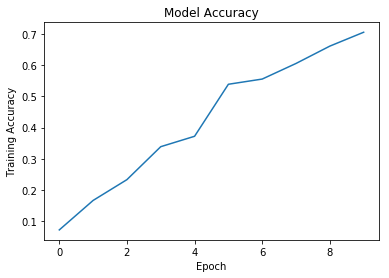

In [88]:
#Visualize the models training accuracy of the third model
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist3.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()

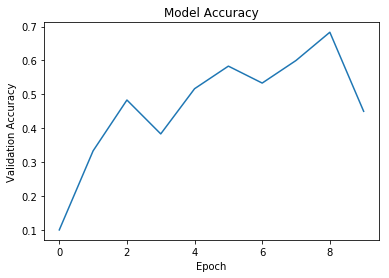

In [89]:
#Visualize the models validation accuracy of the third model
plt.plot(hist3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

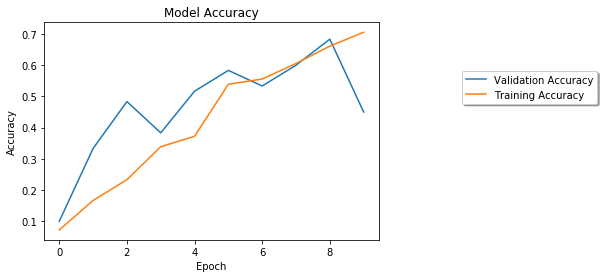

In [90]:
#Visualize the third model's validation accuracy and training accuracy
plt.plot(hist3.history['val_acc'], label='Validation Accuracy')
plt.plot(hist3.history['acc'], label = 'Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

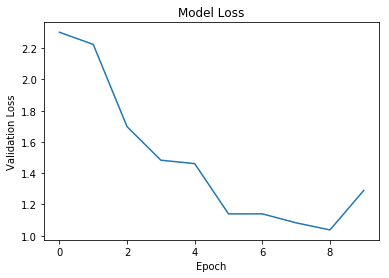

In [91]:
#Visualize the models validation loss of the third model
plt.plot(hist3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

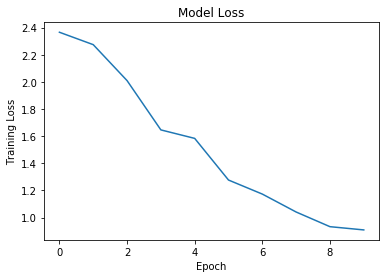

In [92]:
#Visualize the models training loss of the third model
plt.plot(hist3.history['loss'])
plt.title('Model Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show()

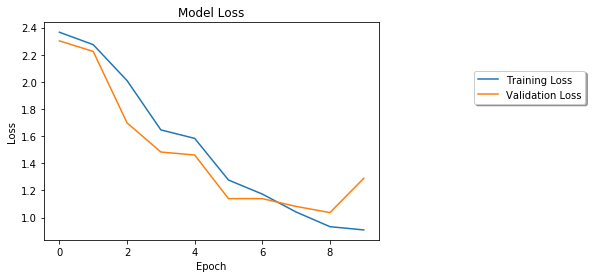

In [93]:
#Visualize the third model's training loss and validation loss on the same plot 
plt.plot(hist3.history['loss'], label = 'Training Loss')
plt.plot(hist3.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

B. Gauri, “bhavul/Caltech-101-Object-Classification,” GitHub. [Online]. 
Available: https://github.com/bhavul/Caltech-101-Object-Classification/blob/master/caltech-experiment.ipynb. [Accessed: 03-Oct-2019].